# hierarchical clustering 

In [2]:
import numpy as np
import pandas as pd

from matplotlib.pyplot import figure, plot, legend, xlabel,ylabel, show
import matplotlib.pyplot as plt

from toolbox_02450 import clusterplot
from toolbox_02450 import clusterval
from sklearn.cluster import k_means
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.mixture import GaussianMixture
from sklearn import model_selection
from scipy.linalg import svd

import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_excel('./data/heart_disease.xlsx')
df.shape
df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,1,62,30.77,14.14,45,0
6,142,4.05,3.38,16.20,0,59,20.81,2.62,38,0
7,114,4.08,4.59,14.60,1,62,23.11,6.72,58,1
8,114,0.00,3.83,19.40,1,49,24.86,2.49,29,0
9,132,0.00,5.80,30.96,1,69,30.11,0.00,53,1


In [4]:
raw_data = df.get_values()
#raw_data = df_no_outliers.get_values()

cols = range(0,9) 
X = raw_data[:, cols]
attributeNames = np.asarray(df.columns[cols])

classLabels = raw_data[:,-1] # -1 takes the last column
classNames = np.unique(classLabels)
#classNames=["no chd","have chd"]
classDict = dict(zip(classNames,range(len(classNames))))

y = np.array([classDict[cl] for cl in classLabels])

N, M = X.shape
C = len(classNames)

In [48]:
#standardlization
X = X - np.ones((N,1))*X.mean(axis=0)
X= X*(1/np.std(X,0))

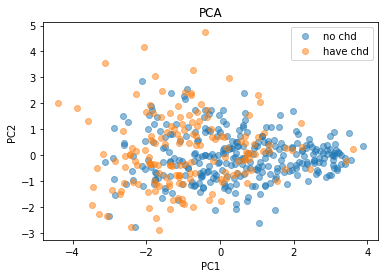

In [49]:
U,S,Vh = svd(X,full_matrices=False)
V = Vh.T   

# Project the centered data onto principal component space
Xp = X @ V

# Indices of the principal components to be plotted
i = 0
j = 1



# Plot PCA of the data
f = plt.figure()
plt.title('PCA')

for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c
    plt.plot(Xp[class_mask,i], Xp[class_mask,j], 'o', alpha=.5)
plt.legend(["no chd","have chd"])
plt.xlabel('PC{0}'.format(i+1))
plt.ylabel('PC{0}'.format(j+1))
plt.show()

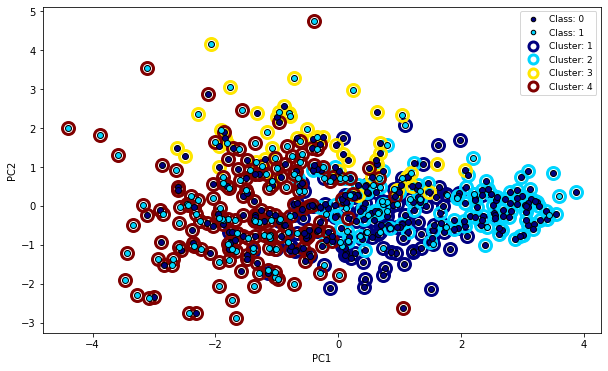

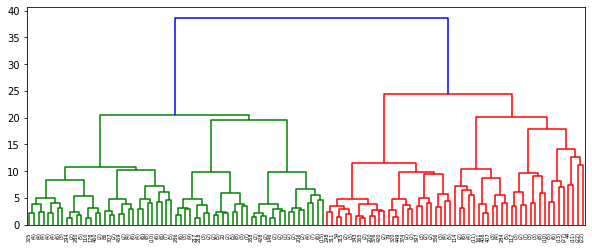

In [205]:

# Perform hierarchical/agglomerative clustering on data matrix
Method = 'ward'
#'single', 'complete', 'average'
Metric = 'euclidean'
#'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski', 'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean'

Z = linkage(X, method=Method, metric=Metric)

# Compute and display clusters by thresholding the dendrogram
Maxclust = 4
cls = fcluster(Z, criterion='maxclust', t=Maxclust)

figure(1,figsize=(10,6))
#clusterplot(X, cls.reshape(cls.shape[0],1), y=y)
idx = [0,1]
clusterplot(Xp[:,idx], cls.reshape(cls.shape[0],1), y=y)
plt.xlabel('PC1')
plt.ylabel('PC2')

# Display dendrogram
max_display_levels=6
figure(2,figsize=(10,4))
dendrogram(Z, truncate_mode='level', p=max_display_levels)

show()

In [149]:
 help(linkage)

Help on function linkage in module scipy.cluster.hierarchy:

linkage(y, method='single', metric='euclidean', optimal_ordering=False)
    Perform hierarchical/agglomerative clustering.
    
    The input y may be either a 1d condensed distance matrix
    or a 2d array of observation vectors.
    
    If y is a 1d condensed distance matrix,
    then y must be a :math:`\binom{n}{2}` sized
    vector where n is the number of original observations paired
    in the distance matrix. The behavior of this function is very
    similar to the MATLAB linkage function.
    
    A :math:`(n-1)` by 4 matrix ``Z`` is returned. At the
    :math:`i`-th iteration, clusters with indices ``Z[i, 0]`` and
    ``Z[i, 1]`` are combined to form cluster :math:`n + i`. A
    cluster with an index less than :math:`n` corresponds to one of
    the :math:`n` original observations. The distance between
    clusters ``Z[i, 0]`` and ``Z[i, 1]`` is given by ``Z[i, 2]``. The
    fourth value ``Z[i, 3]`` represents the n

In [206]:
# You can find many additional cluster validity measures in sklearn.metrics.cluster package
Rand, Jaccard, NMI = clusterval(y,cls) 

print("Rand:{0}".format(Rand))
print("Jaccard:{0}".format(Jaccard))
print("NMI:{0}".format(NMI))


Rand:0.49666168972025804
Jaccard:0.2498845459507116
NMI:0.05453002317479984


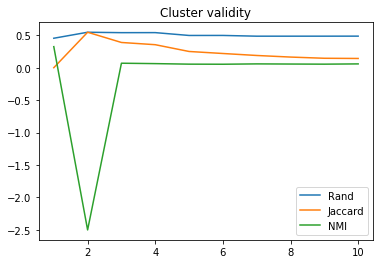

In [195]:
# Maximum number of clusters:
K = 10

# Allocate variables:
Rand = np.zeros((K,))
Jaccard = np.zeros((K,))
NMI = np.zeros((K,))

for k in range(K):
    # run K-means clustering:
    #cls = Pycluster.kcluster(X,k+1)[0]
    #centroids, cls, inertia = k_means(X,k+1)
    cls = fcluster(Z, criterion='maxclust', t=k)
    # compute cluster validities:
    Rand[k], Jaccard[k], NMI[k] = clusterval(y,cls)    
        
# Plot results:

figure(1)
title('Cluster validity')
plot(np.arange(K)+1, Rand)
plot(np.arange(K)+1, Jaccard)
plot(np.arange(K)+1, NMI)
legend(['Rand', 'Jaccard', 'NMI'], loc=4)
show()


# GMM

Fitting model for K=1
Fitting model for K=2
Fitting model for K=3
Fitting model for K=4
Fitting model for K=5
Fitting model for K=6
Fitting model for K=7
Fitting model for K=8
Fitting model for K=9
Fitting model for K=10
Fitting model for K=11
Fitting model for K=12
Fitting model for K=13
Fitting model for K=14
Fitting model for K=15


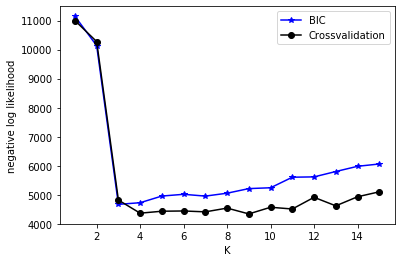

In [207]:
# Range of K's to try
KRange = range(1,16)
T = len(KRange)

covar_type = 'full'       # you can try out 'diag' as well
reps = 10                 # number of fits with different initalizations, best result will be kept
init_procedure = 'kmeans' # 'kmeans' or 'random'

# Allocate variables
BIC = np.zeros((T,))
#AIC = np.zeros((T,))
CVE = np.zeros((T,))

# K-fold crossvalidation
CV = model_selection.KFold(n_splits=10,shuffle=True)

for t,K in enumerate(KRange):
        print('Fitting model for K={0}'.format(K))

        # Fit Gaussian mixture model
        gmm = GaussianMixture(n_components=K, covariance_type=covar_type, 
                              n_init=reps, init_params=init_procedure,
                              tol=1e-6, reg_covar=1e-6).fit(X)
        
        # Get BIC and AIC
        BIC[t,] = gmm.bic(X)
       # AIC[t,] = gmm.aic(X)

        # For each crossvalidation fold
        for train_index, test_index in CV.split(X):

            # extract training and test set for current CV fold
            X_train = X[train_index]
            X_test = X[test_index]

            # Fit Gaussian mixture model to X_train
            gmm = GaussianMixture(n_components=K, covariance_type=covar_type, n_init=reps).fit(X_train)

            # compute negative log likelihood of X_test
            CVE[t] += -gmm.score_samples(X_test).sum()
            

# Plot results

figure(1); 
plot(KRange, BIC,'-*b')
#plot(KRange, AIC,'-xr')
plot(KRange, 2*CVE,'-ok')
legend(['BIC', 'Crossvalidation'])
xlabel('K')
ylabel('negative log likelihood')
show()

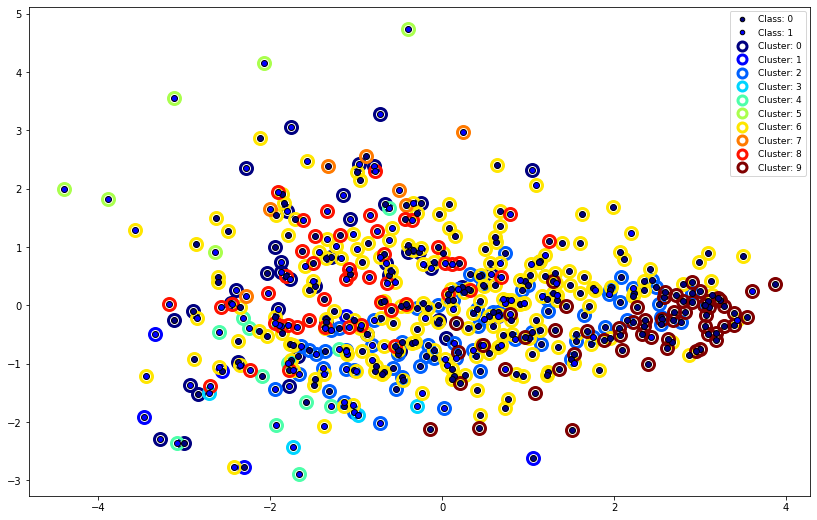

In [201]:
# Number of clusters
K = 10
# type of covariance, you can try out 'diag' as well
cov_type = 'full' # e.g. 'full' or 'diag'

# define the initialization procedure (initial value of means)
initialization_method = 'random'#  'random' or 'kmeans'
# random signifies random initiation, kmeans means we run a K-means and use the
# result as the starting point. K-means might converge faster/better than  
# random, but might also cause the algorithm to be stuck in a poor local minimum 

# number of fits with different initalizations, best result will be kept
reps = 15

# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps, 
                      tol=1e-6, reg_covar=1e-6, init_params=initialization_method).fit(X)
cls = gmm.predict(X)    
# extract cluster labels
cds = gmm.means_        
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_
# extract cluster shapes (covariances of gaussians)
if cov_type.lower() == 'diag':
    new_covs = np.zeros([K,M,M])    
    
    count = 0    
    for elem in covs:
        temp_m = np.zeros([M,M])
        new_covs[count] = np.diag(elem)
        count += 1

    covs = new_covs

# Plot results:
#figure(figsize=(14,9))
#clusterplot(X, clusterid=cls, centroids=cds, y=y, covars=covs)
#show()

## In case the number of features != 2, then a subset of features most be plotted instead.
figure(figsize=(14,9))
idx = [0,1] # feature index, choose two features to use as x and y axis in the plot
#clusterplot(X[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])
#clusterplot(Xp[:,idx], clusterid=cls, centroids=cds[:,idx], y=y, covars=covs[:,idx,:][:,:,idx])
clusterplot(Xp[:,idx], clusterid=cls, y=y)
show()

In [202]:
# You can find many additional cluster validity measures in sklearn.metrics.cluster package
Rand, Jaccard, NMI = clusterval(y,cls)   

print("Rand:{0}".format(Rand))
print("Jaccard:{0}".format(Jaccard))
print("NMI:{0}".format(NMI))

      

Rand:0.5077612192579655
Jaccard:0.23599714331521185
NMI:0.07902792957212618


In [160]:
cds

array([[-0.27111086, -0.79237399, -0.46698302, -0.43314859, -0.26500335,
         0.00114533, -0.24435853, -0.56297184, -0.71105997],
       [-0.16178933,  0.22217851,  0.43364386,  0.44360745,  0.19613332,
         0.04089007,  0.3509548 , -0.6559345 ,  0.4858547 ],
       [-0.28432691, -0.31455243, -0.3082138 , -0.32661717, -0.12748464,
         0.1263515 , -0.05668454,  0.40541087, -0.5539005 ],
       [ 0.64347185,  0.78303094,  0.38505873,  0.37436363,  0.19976624,
        -0.17624816, -0.00875329,  0.41683932,  0.8098027 ]])


# Association mining

In [11]:
from similarity import binarize2
from apyori import apriori

In [12]:

# Remove attribute famhist 
rem_attr1= list(df.columns).index('famhist')
rem_attr2= list(df.columns).index('chd')

col1=X[:,rem_attr1]
col1=np.expand_dims(col1,1)
col2=y;
col2=np.expand_dims(col2,1)

X=np.delete(X,rem_attr1,1)

attributeNames = np.delete(attributeNames,rem_attr1)

# Update N and M
#N, M = X.shape

Xbin, attributeNamesBin = binarize2(X, attributeNames)

Xbin=np.append(Xbin,col1,1)
Xbin=np.append(Xbin,col2,1)
attributeNamesBin.append('famhist')
attributeNamesBin.append('chd')

In [13]:
def mat2transactions(X, labels=[]):
    T = []
    for i in range(X.shape[0]):
        l = np.nonzero(X[i, :])[0].tolist()
        if labels:
            l = [labels[i] for i in l]
        T.append(l)
    return T

# apyori requires data to be in a transactions format, forunately we just wrote a helper function to do that.
T = mat2transactions(Xbin,labels=attributeNamesBin)
rules = apriori( T, min_support=0.3, min_confidence=.6)

# This function print the found rules and also returns a list of rules in the format:
# [(x,y), ...]
# where x -> y
def print_apriori_rules(rules):
    frules = []
    for r in rules:
        for o in r.ordered_statistics:        
            conf = o.confidence
            supp = r.support
            x = ", ".join( list( o.items_base ) )
            y = ", ".join( list( o.items_add ) )
            print("{%s} -> {%s}  (supp: %.3f, conf: %.3f)"%(x,y, supp, conf))
            frules.append( (x,y) )
    return frules
# Print rules found in the courses file.
print_apriori_rules(rules)


{adiposity 0th-50th percentile} -> {age 0th-50th percentile}  (supp: 0.361, conf: 0.723)
{age 0th-50th percentile} -> {adiposity 0th-50th percentile}  (supp: 0.361, conf: 0.693)
{adiposity 0th-50th percentile} -> {ldl 0th-50th percentile}  (supp: 0.342, conf: 0.684)
{ldl 0th-50th percentile} -> {adiposity 0th-50th percentile}  (supp: 0.342, conf: 0.681)
{adiposity 0th-50th percentile} -> {sbp 0th-50th percentile}  (supp: 0.312, conf: 0.623)
{adiposity 0th-50th percentile} -> {tobacco 0th-50th percentile}  (supp: 0.314, conf: 0.628)
{tobacco 0th-50th percentile} -> {adiposity 0th-50th percentile}  (supp: 0.314, conf: 0.620)
{adiposity 50th-100th percentile} -> {age 50th-100th percentile}  (supp: 0.340, conf: 0.680)
{age 50th-100th percentile} -> {adiposity 50th-100th percentile}  (supp: 0.340, conf: 0.710)
{adiposity 50th-100th percentile} -> {ldl 50th-100th percentile}  (supp: 0.340, conf: 0.680)
{ldl 50th-100th percentile} -> {adiposity 50th-100th percentile}  (supp: 0.340, conf: 0.68

[('adiposity 0th-50th percentile', 'age 0th-50th percentile'),
 ('age 0th-50th percentile', 'adiposity 0th-50th percentile'),
 ('adiposity 0th-50th percentile', 'ldl 0th-50th percentile'),
 ('ldl 0th-50th percentile', 'adiposity 0th-50th percentile'),
 ('adiposity 0th-50th percentile', 'sbp 0th-50th percentile'),
 ('adiposity 0th-50th percentile', 'tobacco 0th-50th percentile'),
 ('tobacco 0th-50th percentile', 'adiposity 0th-50th percentile'),
 ('adiposity 50th-100th percentile', 'age 50th-100th percentile'),
 ('age 50th-100th percentile', 'adiposity 50th-100th percentile'),
 ('adiposity 50th-100th percentile', 'ldl 50th-100th percentile'),
 ('ldl 50th-100th percentile', 'adiposity 50th-100th percentile'),
 ('adiposity 50th-100th percentile', 'tobacco 50th-100th percentile'),
 ('tobacco 50th-100th percentile', 'adiposity 50th-100th percentile'),
 ('age 0th-50th percentile', 'ldl 0th-50th percentile'),
 ('ldl 0th-50th percentile', 'age 0th-50th percentile'),
 ('age 0th-50th percentile'